In [21]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

emails = pd.read_csv('spam.csv')

X, y = emails['EmailText'], emails['Label']

In [22]:
# create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [48]:
# since we are dealing with text
# we have to use CountVectorizer before fitting
# a model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

tfid = TfidfTransformer()
vectorizer = CountVectorizer()
extracted_features = vectorizer.fit_transform(X_train)
extracted_features_tfid = tfid.fit(extracted_features)

In [49]:
# train the model
from sklearn.naive_bayes import BernoulliNB

bnb_clf = BernoulliNB()
bnb_clf.fit(extracted_features,y_train)

BernoulliNB()

In [51]:
# evaluate the model
from sklearn.model_selection import cross_val_score

cross_val_score(bnb_clf, extracted_features, y_train, cv=3, scoring='accuracy')

array([0.97510094, 0.97711978, 0.97575758])

In [52]:
# lets create a confusion matrix to see how the model is doing
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_bnb_pred = cross_val_predict(bnb_clf, extracted_features, y_train, cv=3)
bnb_mtx = confusion_matrix(y_train, y_bnb_pred)

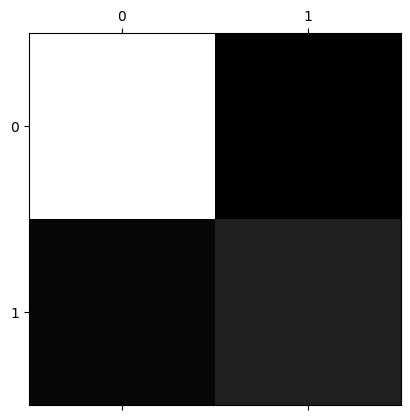

In [53]:
# graphical representation of confusion matrix
# seems to predict spam easily but has trouble predicting ham
plt.matshow(bnb_mtx, cmap = plt.cm.gray)
plt.show()

In [57]:
# lets try a different model to compare, we'll use a Support Vector Machine
from sklearn import svm
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'kernel':['rbf','linear'],'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]}
svm_clf = GridSearchCV(svm.SVC(), tuned_parameters)
svm_clf.fit(extracted_features,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [58]:
from sklearn.metrics import classification_report

test_features = vectorizer.transform(X_test)
test_features_tfid = tfid.transform(test_features)

pred = svm_clf.predict(test_features)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       968
        spam       0.98      0.93      0.95       147

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [59]:
# export the SVM model to our models folder
import joblib

cols = list(emails.columns)
ref_cols = cols[1]
target = cols[0]

joblib.dump(value = [svm_clf,ref_cols,target,vectorizer, tfid], filename='models/model.pkl')

['models/model.pkl']